# Anomaly Detection with Unsupservised Learning

Anomaly detection is the identification of rare items, events or observations which raise suspicioins by differing significantly from the majority of the data. Anomalous data can be connected to some kind of problem or rare event. This connection makes it very interesting to be able to pick out which data points can be considered anomalies, as identifying these events are typically very interesting.

Unsupervised anomaly detection technieques detect anomalies in an unlabeled test data set under the ssumption that the majority of the instances in the dataset are normal. It looks for instances that seem to fit least to the remainder of the dataset.

In [1]:
import numpy as np
import pandas as pd
from bat.log_to_dataframe import LogToDataFrame
%matplotlib inline
import matplotlib.pyplot as plt
from bat import dataframe_to_matrix
import sklearn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
import numpy as np

In [2]:
http_df = pd.read_csv('data/http_log.csv')

In [3]:
http_df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,...,info_msg,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types
0,2012-Mar-16_07:30:00,CHEt7z3AzG4gyCNgci,192.168.202.79,50465,192.168.229.251,80,1,HEAD,192.168.229.251,/DEASLog02.nsf,...,-,-,(empty),-,-,-,-,-,-,-
1,2012-Mar-16_07:30:00,CKnDAp2ohlvN6rpiXl,192.168.202.79,50467,192.168.229.251,80,1,HEAD,192.168.229.251,/DEASLog03.nsf,...,-,-,(empty),-,-,-,-,-,-,-
2,2012-Mar-16_07:30:00,CNTrjn42F3LB58MZH6,192.168.202.79,50469,192.168.229.251,80,1,HEAD,192.168.229.251,/DEASLog04.nsf,...,-,-,(empty),-,-,-,-,-,-,-
3,2012-Mar-16_07:30:00,C1D7mK1PlzKEnEyG03,192.168.202.79,50471,192.168.229.251,80,1,HEAD,192.168.229.251,/DEASLog05.nsf,...,-,-,(empty),-,-,-,-,-,-,-
4,2012-Mar-16_07:30:00,CGF1bVMyl9ALKI32l,192.168.202.79,50473,192.168.229.251,80,1,HEAD,192.168.229.251,/DEASLog.nsf,...,-,-,(empty),-,-,-,-,-,-,-


Remove columns with alot of null vaules

In [4]:
http_df.drop(columns=['filename', 'tags', 'username', 'password', 'proxied', 'orig_fuids', 'orig_mime_types', 'resp_fuids', 'resp_mime_types', 'info_code', 'info_msg', 'referrer'])

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,user_agent,request_body_len,response_body_len,status_code,status_msg
0,2012-Mar-16_07:30:00,CHEt7z3AzG4gyCNgci,192.168.202.79,50465,192.168.229.251,80,1,HEAD,192.168.229.251,/DEASLog02.nsf,Mozilla/5.0 (compatible; Nmap Scripting Engine...,0,0,404,Not Found
1,2012-Mar-16_07:30:00,CKnDAp2ohlvN6rpiXl,192.168.202.79,50467,192.168.229.251,80,1,HEAD,192.168.229.251,/DEASLog03.nsf,Mozilla/5.0 (compatible; Nmap Scripting Engine...,0,0,404,Not Found
2,2012-Mar-16_07:30:00,CNTrjn42F3LB58MZH6,192.168.202.79,50469,192.168.229.251,80,1,HEAD,192.168.229.251,/DEASLog04.nsf,Mozilla/5.0 (compatible; Nmap Scripting Engine...,0,0,404,Not Found
3,2012-Mar-16_07:30:00,C1D7mK1PlzKEnEyG03,192.168.202.79,50471,192.168.229.251,80,1,HEAD,192.168.229.251,/DEASLog05.nsf,Mozilla/5.0 (compatible; Nmap Scripting Engine...,0,0,404,Not Found
4,2012-Mar-16_07:30:00,CGF1bVMyl9ALKI32l,192.168.202.79,50473,192.168.229.251,80,1,HEAD,192.168.229.251,/DEASLog.nsf,Mozilla/5.0 (compatible; Nmap Scripting Engine...,0,0,404,Not Found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2012-Mar-16_07:47:11,CYHDjD4avK3IdFlEhk,192.168.202.79,39318,192.168.229.153,5357,1,GET,192.168.229.153,/wp-content/plugins/gtranslate/,Mozilla/5.0 (compatible; Nmap Scripting Engine...,0,326,503,Service Unavailable
596,2012-Mar-16_07:47:11,CYwdbY1NstFFjnf732,192.168.202.79,34180,192.168.229.251,5488,1,HEAD,192.168.229.251,/weblogs/,Mozilla/5.0 (compatible; Nmap Scripting Engine...,0,0,404,Not Found
597,2012-Mar-16_07:47:11,CFqmIj2EQX12HBuQxa,192.168.202.79,50295,192.168.229.101,80,1,GET,192.168.229.101,/wp-content/plugins/simple-tags/,Mozilla/5.0 (compatible; Nmap Scripting Engine...,0,238,404,NOT FOUND
598,2012-Mar-16_07:47:11,CkXF3k4CKKryVTjGKl,192.168.202.79,39321,192.168.229.153,5357,1,HEAD,192.168.229.153,/admin_area/index.html,Mozilla/5.0 (compatible; Nmap Scripting Engine...,0,0,503,Service Unavailable


Lets look at our data

array([[<AxesSubplot:title={'center':'request_body_len'}>,
        <AxesSubplot:title={'center':'response_body_len'}>]], dtype=object)

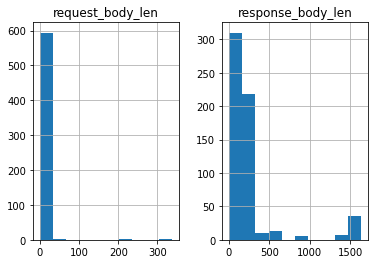

In [5]:
http_df[['request_body_len', 'response_body_len']].hist()

# Exercise 1

Build a time-series analysis of this data

<AxesSubplot:xlabel='ts'>

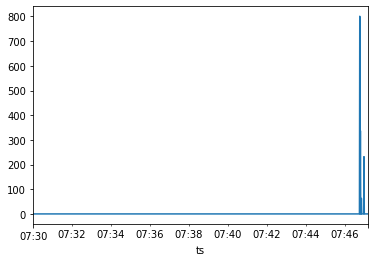

In [6]:
http_df['ts'] = pd.to_datetime(http_df['ts'], format='%Y-%b-%d_%H:%M:%S')
http_df = http_df.set_index('ts')
http_df['request_body_len'].resample('1S').sum().plot()

<AxesSubplot:xlabel='ts'>

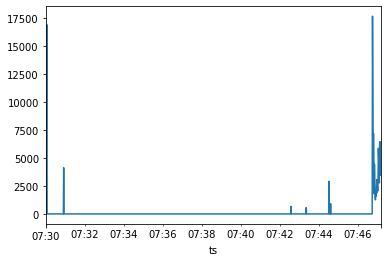

In [7]:
http_df['response_body_len'].resample('1S').sum().plot()

We have a mix of quantitative and qualitative data. We need a way to handle both data types in a generalized way. We will rely on the label encoder to convert the qualitative into machine-readable form.

In [8]:
http_df.drop(columns=['uid'])

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,referrer,user_agent,...,info_msg,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types
ts,,,,,,,,,,,,,,,,,,,,,
2012-03-16 07:30:00,192.168.202.79,50465,192.168.229.251,80,1,HEAD,192.168.229.251,/DEASLog02.nsf,-,Mozilla/5.0 (compatible; Nmap Scripting Engine...,...,-,-,(empty),-,-,-,-,-,-,-
2012-03-16 07:30:00,192.168.202.79,50467,192.168.229.251,80,1,HEAD,192.168.229.251,/DEASLog03.nsf,-,Mozilla/5.0 (compatible; Nmap Scripting Engine...,...,-,-,(empty),-,-,-,-,-,-,-
2012-03-16 07:30:00,192.168.202.79,50469,192.168.229.251,80,1,HEAD,192.168.229.251,/DEASLog04.nsf,-,Mozilla/5.0 (compatible; Nmap Scripting Engine...,...,-,-,(empty),-,-,-,-,-,-,-
2012-03-16 07:30:00,192.168.202.79,50471,192.168.229.251,80,1,HEAD,192.168.229.251,/DEASLog05.nsf,-,Mozilla/5.0 (compatible; Nmap Scripting Engine...,...,-,-,(empty),-,-,-,-,-,-,-
2012-03-16 07:30:00,192.168.202.79,50473,192.168.229.251,80,1,HEAD,192.168.229.251,/DEASLog.nsf,-,Mozilla/5.0 (compatible; Nmap Scripting Engine...,...,-,-,(empty),-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-03-16 07:47:11,192.168.202.79,39318,192.168.229.153,5357,1,GET,192.168.229.153,/wp-content/plugins/gtranslate/,-,Mozilla/5.0 (compatible; Nmap Scripting Engine...,...,-,-,(empty),-,-,-,-,-,FS3Itc2I2Q2KJNgrj,text/html
2012-03-16 07:47:11,192.168.202.79,34180,192.168.229.251,5488,1,HEAD,192.168.229.251,/weblogs/,-,Mozilla/5.0 (compatible; Nmap Scripting Engine...,...,-,-,(empty),-,-,-,-,-,-,-
2012-03-16 07:47:11,192.168.202.79,50295,192.168.229.101,80,1,GET,192.168.229.101,/wp-content/plugins/simple-tags/,-,Mozilla/5.0 (compatible; Nmap Scripting Engine...,...,-,-,(empty),-,-,-,-,-,FCshk224n44luILLzd,text/html


In [9]:
# Use the bat DataframeToMatrix class (handles categorical data)
# You can see below it uses a heuristic to detect category data. When doing
# this for real we should explicitly convert before sending to the transformer.
to_matrix = dataframe_to_matrix.DataFrameToMatrix()
bro_matrix = to_matrix.fit_transform(http_df)

Changing column id.orig_h to category...
Changing column id.resp_h to category...
Changing column method to category...
Changing column host to category...
Changing column referrer to category...
Changing column user_agent to category...
Changing column status_code to category...
Changing column status_msg to category...
Changing column info_code to category...
Changing column info_msg to category...
Changing column filename to category...
Changing column tags to category...
Changing column username to category...
Changing column password to category...
Changing column proxied to category...
Changing column orig_fuids to category...
Changing column orig_mime_types to category...
Changing column resp_mime_types to category...
Normalizing column id.orig_p...
Normalizing column id.resp_p...
Normalizing column trans_depth...
Normalizing column request_body_len...
Normalizing column response_body_len...
Dropping uid column...
Dropping uri column...
Dropping resp_fuids column...


K-Means clustering is a method that aims to partition n observations into k clusters in which each observations belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

K-means clustering is unsupervised learning. The goal of this algorithm is to find groups in the daa, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

1. The centroids of the K clusters, which can be used to label new data
2. Labels for the training data (each data point is assigned to a sinle cluster)

Rather than defining groups before you look at the data, clustering allows you to find and analzye the groups that have formed organically.

In [33]:
kmeans = KMeans(n_clusters=9).fit_predict(bro_matrix)
projection = TSNE().fit_transform(bro_matrix)

http_df['x'] = projection[:, 0]
http_df['y'] = projection[:, 1]
http_df['cluster'] = kmeans
http_df[['x', 'y', 'cluster']].head()

/home/iti/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/iti/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,x,y,cluster
ts,,,
2012-03-16 07:30:00,24.434782,-21.581390,1
2012-03-16 07:30:00,24.273012,-21.563652,1
2012-03-16 07:30:00,24.143225,-21.591427,1
2012-03-16 07:30:00,24.499489,-21.909649,1
2012-03-16 07:30:00,24.467987,-22.000763,1


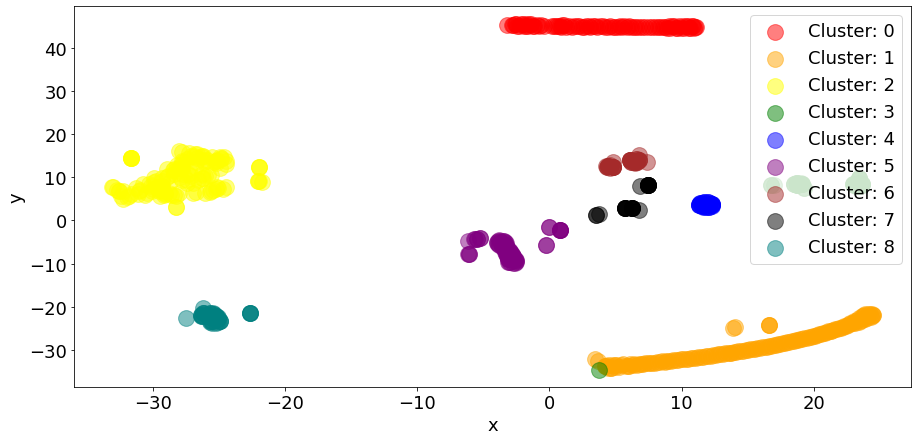

In [34]:
plt.rcParams['font.size'] = 18.0
plt.rcParams['figure.figsize'] = 15.0, 7.0

# Group by cluster
cluster_groups = http_df.groupby('cluster')

# plot the ml results
fig, ax = plt.subplots()
colors = {0: 'red', 1:'orange', 2:'yellow', 3:'green', 4:'blue', 
          5:'purple', 6:'brown', 7:'black', 8:'teal'}
for key, group in cluster_groups:
    group.plot(ax=ax, kind='scatter', x='x', y='y', alpha=0.5, s=250,
              label='Cluster: {:d}'.format(key), color=colors[key])

# Exercise 2

Play around with the number of clusters and see what number you best
represents the data

In [28]:
# Now print out the details for each cluster
pd.set_option('display.width', 1000)
show_fields = ['trans_depth']
for key, group in cluster_groups:
    print('\nCluster {:d}: {:d} observations'.format(key, len(group)))
    print(group.head())


Cluster 0: 148 observations
                                    uid       id.orig_h  id.orig_p        id.resp_h  id.resp_p  trans_depth method             host             uri referrer  ... password  proxied  orig_fuids orig_mime_types resp_fuids resp_mime_types          x          y cluster cluster_db
ts                                                                                                                                                            ...                                                                                                                  
2012-03-16 07:30:00  CHEt7z3AzG4gyCNgci  192.168.202.79      50465  192.168.229.251         80            1   HEAD  192.168.229.251  /DEASLog02.nsf        -  ...        -        -           -               -          -               -  27.205418  16.223316       0          0
2012-03-16 07:30:00  CKnDAp2ohlvN6rpiXl  192.168.202.79      50467  192.168.229.251         80            1   HEAD  192.168.229.251  /DEASLog03

Lets Investigate the clusters of data

We cramed a bunch of features into the clustering algorithm. The features were both numerical and categorical. So did the clustering 'do the right thing'? Well first some caveats and disclaimers:
* Working with a small amount of data

How the clustering did on both numeric and categorical data combined?

The unsupervised machine learning technique of clustering data inot similar groups can be useful and fairly efficient in most cases. The big trick as you saw earlier was how you pick the number of clusters to make (the K hyperparameter). The number of clusters may vary dramatically depending on the characteristics of the data. The different types of variables (numeric or categorical) , how the data is normalized/encoded and the distance metric used.

### Silhouetter Scoring

The silhouetter value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The sillhouetter ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clusering configuration may have too many or too few clusters.

<AxesSubplot:xlabel='Num Clusters'>

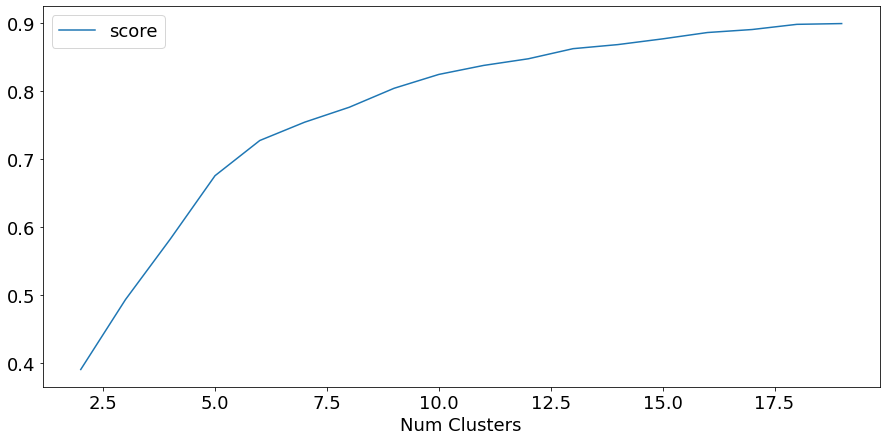

In [13]:
from sklearn.metrics import silhouette_score

scores = []
clusters = range(2,20)
for K in clusters:
    
    clusterer = KMeans(n_clusters=K)
    cluster_labels = clusterer.fit_predict(bro_matrix)
    score = silhouette_score(bro_matrix, cluster_labels)
    scores.append(score)

# Plot it out
pd.DataFrame({'Num Clusters':clusters, 'score':scores}).plot(x='Num Clusters', y='score')

Silhouette graphs shows that maybe 6 is the 'optimal' number of clusters
'Optimal': Human intuition and clustering involves interpretation/pattern finding and is often partially subjective
For large datasets running an exhaustive search can be time consuming
For large datasets you can often get a large K using max score, so pick the 'knee' of the graph as your K

# DBSCAN

Density-based spatial clustering is a data clustering algorithm that given a set of points in space, groups points that are closely packed together and marking low-density regions as outliers.

You don't have to pick K
There are other hyperparameters (eps and min_samples) but defaults often work well

In [14]:
http_df['cluster_db'] = DBSCAN().fit_predict(bro_matrix)
print('Number of Clusters: {:d}'.format(http_df['cluster_db'].nunique()))

Number of Clusters: 15


So obviously we got a bit lucky here and for different datasets with different feature distributions DBSCAN may not give you the optimal number of clusters right off the bat. There are two hyperparameters that can be tweeked but like we said the defaults often work well.

Clustering it a good technique to include in your toolset. Understanding the K hyperparameter and how to determine optimal K (or not if you're using DBSCAN) is a good trick to know.

References: 
1. https://github.com/SuperCowPowers/bat